# Assignment 2 - DoWhy

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import dowhy
from dowhy.do_why import CausalModel
from IPython.display import Image, display

# Data exploration

In [17]:
variable_dictionary = {
# Oversight
'dem_senate_maj': 'democratic senate majority', 

# clinical/ epidemiological variables
'hosp_count': 'US Hospitalizations associated w/ Primary Indication Disease', 
'incidence_avg': 'Incidence of primary indication',
'hosp_len': 'average length of hospitalizations (days)',
'lethal': 'Primary Indication is Lethal', 
'death_rate_avg': 'Death Rate, Primary Indication (per 1000)',
'hosp_on_indicidence': 'Millions of Hospitalizations assc w/ Indication', 
'female_target': 'Disease Mainly Affects Women [0, 1]', 
'male_target': 'Disease Mainly Affects Men [0, 1]', 
'child_target': 'Disease Mainly Affects Children [0, 1]', 
'acute_cond_on_incidence': 'Primary Indication is Acute Condition [0, 1]', 
'orphan_drug': 'Orphan Drug [0, 1]', 

# disease politics (groups and media) variables
'nat_reg_groups': 'Number of National and Regional Groups representing Sufferers or Advocates of Indication Disease', 
'cong_hearing_days': 'Days of Cong Hrgs on Disease, 4-Year MA',
'order_disease_mkt': 'Order of Disease Market Entry for Drug i',
'tv_news_nightly_avg': 'Nightly TV News Disease Stories, 4-Year MA',
'wash_post_stories': 'Washington Post Disease Stories, 4-Year MA', 

# FDA variable
'cder_staff': 'CDER staff', 

# outcome
'approval_days': 'approval days', 
'approved': 'approved [0, 1]'
}

df = pd.DataFrame.from_dict(variable_dictionary, orient='index')
df

,0
dem_senate_maj,democratic senate majority
hosp_count,US Hospitalizations associated w/ Primary Indi...
incidence_avg,Incidence of primary indication
hosp_len,average length of hospitalizations (days)
lethal,Primary Indication is Lethal
death_rate_avg,"Death Rate, Primary Indication (per 1000)"
hosp_on_indicidence,Millions of Hospitalizations assc w/ Indication
female_target,"Disease Mainly Affects Women [0, 1]"
male_target,"Disease Mainly Affects Men [0, 1]"
child_target,"Disease Mainly Affects Children [0, 1]"


In [18]:
data = pd.read_csv('FDA-Carpenter_clean.csv')
data.head()

,dem_senate_maj,hosp_count,nat_reg_groups,cder_staff,incidence_avg,hosp_len,cong_hearing_days,order_disease_mkt,tv_news_nightly_avg,wash_post_stories,lethal,death_rate_avg,hosp_on_indicidence,female_target,male_target,child_target,acute_cond_on_incidence,orphan_drug,approval_days,approved
0,0,75172,12,1043,115.68,3.00,2.0,18,0.50,51.25,1,0.0995,1,0,0,0,0,0,37.44658,1
1,0,0,1,1043,100.00,0.00,0.0,3,0.75,25.25,0,0.0000,0,0,0,0,0,0,84.29589,1
2,0,134882,9,1043,1.30,3.04,0.0,2,0.00,4.25,1,0.1500,1,0,1,0,0,0,15.38630,1
3,0,75172,12,1043,115.68,3.00,2.0,19,0.50,51.25,1,0.0995,1,0,0,0,0,0,46.15891,1
4,0,75172,12,1029,115.68,3.00,2.0,23,0.75,52.00,1,0.0995,1,0,0,0,0,0,50.86028,1


# 1 - Model 

## 1a - Complete graph

INFO:dowhy.do_why:Model to find the causal effect of treatment ['dem_senate_maj'] on outcome ['approval_days']


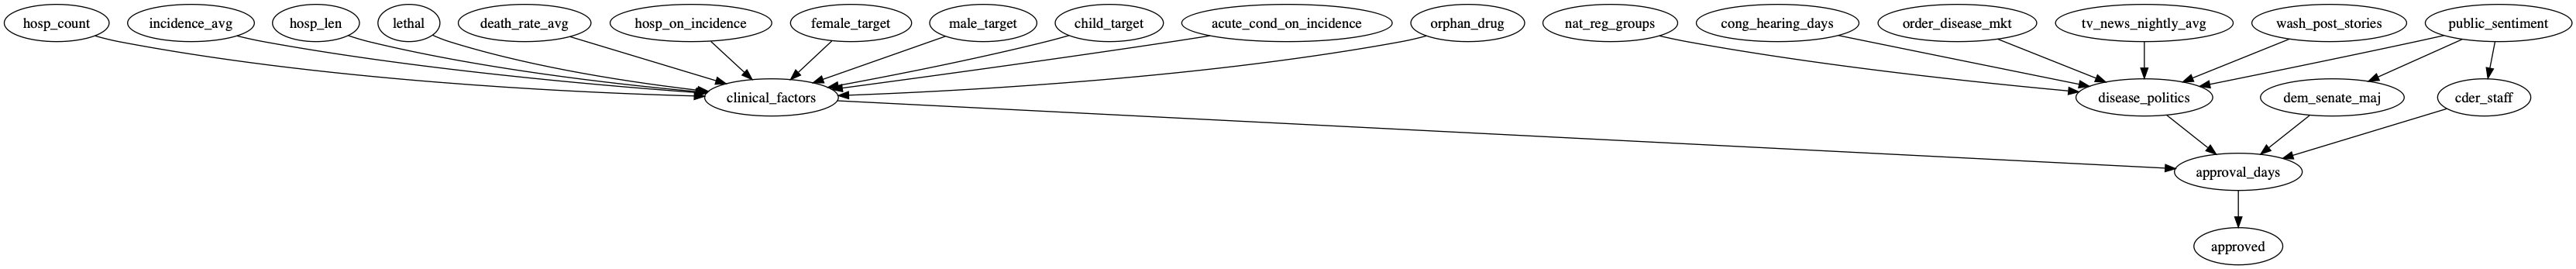

In [184]:
model_a = CausalModel(
        data = data,
        treatment='dem_senate_maj',
        outcome='approval_days',
        graph="digraph {dem_senate_maj -> approval_days;\
        approval_days -> approved;\
        \
        hosp_count -> clinical_factors;\
        incidence_avg -> clinical_factors;\
        hosp_len -> clinical_factors;\
        lethal -> clinical_factors;\
        death_rate_avg -> clinical_factors;\
        hosp_on_incidence -> clinical_factors;\
        female_target -> clinical_factors;\
        male_target -> clinical_factors;\
        child_target -> clinical_factors;\
        acute_cond_on_incidence -> clinical_factors;\
        orphan_drug -> clinical_factors;\
        \
        clinical_factors -> approval_days;\
        \
        nat_reg_groups -> disease_politics;\
        cong_hearing_days -> disease_politics;\
        order_disease_mkt -> disease_politics;\
        tv_news_nightly_avg -> disease_politics;\
        wash_post_stories -> disease_politics;\
        \
        disease_politics -> approval_days;\
        \
        cder_staff -> approval_days;\
        \
        public_sentiment -> dem_senate_maj;\
        public_sentiment -> disease_politics;\
        public_sentiment -> cder_staff}"
                )
model_a.view_model()

from IPython.display import Image, display
display(Image(filename="causal_model.png"))

## 1b - Simplified model

INFO:dowhy.do_why:Model to find the causal effect of treatment ['dem_senate_maj'] on outcome ['approval_days']


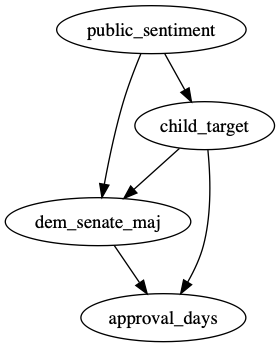

In [185]:
model_b = CausalModel(
        data = data,
        treatment='dem_senate_maj',
        outcome='approval_days',
        graph="digraph {dem_senate_maj -> approval_days;\
        \
        child_target -> approval_days;\
        child_target -> dem_senate_maj;\
        \
        public_sentiment -> dem_senate_maj;\
        public_sentiment -> child_target}"
                )
model_b.view_model()

from IPython.display import Image, display
display(Image(filename="causal_model.png"))

# 2 - Identify

## 2a - Complete model

In [187]:
# Causal estimand
identified_estimand_a = model_a.identify_effect()
print(identified_estimand_a)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['public_sentiment']


WARN: Do you want to continue by ignoring these unobserved confounders? [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                                   
───────────────(Expectation(approval_days))
ddem_senate_maj                            
Estimand assumption 1, Unconfoundedness: If U→dem_senate_maj and U→approval_days then P(approval_days|dem_senate_maj,,U) = P(approval_days|dem_senate_maj,)
### Estimand : 2
Estimand name: iv
No such variable found!



## 2b - Simplified model

In [188]:
# Causal estimand
identified_estimand_b = model_b.identify_effect()
print(identified_estimand_b)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['public_sentiment', 'child_target']


WARN: Do you want to continue by ignoring these unobserved confounders? [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                                                
───────────────(Expectation(approval_days|child_target))
ddem_senate_maj                                         
Estimand assumption 1, Unconfoundedness: If U→dem_senate_maj and U→approval_days then P(approval_days|dem_senate_maj,child_target,U) = P(approval_days|dem_senate_maj,child_target)
### Estimand : 2
Estimand name: iv
No such variable found!



# 1 - Estimate

## 1a - Complete model

### Method 1: Matching

In [189]:
# Matching
causal_estimate_match = model_a.estimate_effect(identified_estimand_a,
        method_name="backdoor.propensity_score_matching")
print(causal_estimate_match)
print("Causal Estimate is " + str(causal_estimate_match.value))

ERROR:dowhy.causal_estimator:No common causes/confounders present. Propensity score based methods are not applicable


Exception: No common causes/confounders present. Propensity score based methods are not applicable

### Method 2: Regression

In [192]:
# Regression
causal_estimate_reg = model_a.estimate_effect(identified_estimand_a,
        method_name="backdoor.linear_regression",
        test_significance=True)
print(causal_estimate_reg)
print("Causal Estimate is " + str(causal_estimate_reg.value))

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: approval_days~dem_senate_maj


*** Causal Estimate ***

## Target estimand
Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                                   
───────────────(Expectation(approval_days))
ddem_senate_maj                            
Estimand assumption 1, Unconfoundedness: If U→dem_senate_maj and U→approval_days then P(approval_days|dem_senate_maj,,U) = P(approval_days|dem_senate_maj,)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: approval_days~dem_senate_maj
## Estimate
Value: -15.140523036809816

## Statistical Significance
p-value: 0.003

Causal Estimate is -15.140523036809816


## 3b - Simplified model

### Method 1: Matching

In [179]:
# Matching
causal_estimate_match = model_b.estimate_effect(identified_estimand_b,
        method_name="backdoor.propensity_score_matching")
print(causal_estimate_match)
print("Causal Estimate is " + str(causal_estimate_match.value))

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: approval_days~dem_senate_maj+child_target


*** Causal Estimate ***

## Target estimand
Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                                                
───────────────(Expectation(approval_days|child_target))
ddem_senate_maj                                         
Estimand assumption 1, Unconfoundedness: If U→dem_senate_maj and U→approval_days then P(approval_days|dem_senate_maj,child_target,U) = P(approval_days|dem_senate_maj,child_target)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: approval_days~dem_senate_maj+child_target
## Estimate
Value: -8.946301236809823

Causal Estimate is -8.946301236809823


/Users/annapauxberger/anaconda/envs/py36/lib/python3.6/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:51: FutureWarning: `item` has been deprecated and will be removed in a future version
  control_outcome = control.iloc[indices[i]][self._outcome_name].item()


### Method 2: Regression

In [191]:
# Regression
causal_estimate_reg = model_b.estimate_effect(identified_estimand_b,
        method_name="backdoor.linear_regression",
        test_significance=True)
print(causal_estimate_reg)
print("Causal Estimate is " + str(causal_estimate_reg.value))

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: approval_days~dem_senate_maj+child_target


*** Causal Estimate ***

## Target estimand
Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                                                
───────────────(Expectation(approval_days|child_target))
ddem_senate_maj                                         
Estimand assumption 1, Unconfoundedness: If U→dem_senate_maj and U→approval_days then P(approval_days|dem_senate_maj,child_target,U) = P(approval_days|dem_senate_maj,child_target)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: approval_days~dem_senate_maj+child_target
## Estimate
Value: -15.189955215386018

## Statistical Significance
p-value: 0.002

Causal Estimate is -15.189955215386018


## 3 - Manual approach

### ATT via matching

In [202]:
# Match on child target and compute treatment effect

data = pd.read_csv('FDA-Carpenter_clean.csv')
simplified_ATT = data[['dem_senate_maj', 'approval_days', 'child_target']].copy()

# control
control_Zis0 = simplified_ATT[(simplified_ATT['dem_senate_maj'] == 0) 
                              & (simplified_ATT['child_target'] == 0)]
control_Zis1 = simplified_ATT[(simplified_ATT['dem_senate_maj'] == 0) 
                              & (simplified_ATT['child_target'] == 1)]

# treatment 
tmt_Zis0 = simplified_ATT[(simplified_ATT['dem_senate_maj'] == 1) 
                          & (simplified_ATT['child_target'] == 0)]
tmt_Zis1 = simplified_ATT[(simplified_ATT['dem_senate_maj'] == 1) 
                          & (simplified_ATT['child_target'] == 1)]


Zis0_effect = (np.mean(tmt_Zis0['approval_days']) - 
               np.mean(control_Zis0['approval_days']))
Zis1_effect = (np.mean(tmt_Zis1['approval_days']) - 
               np.mean(control_Zis1['approval_days']))
ATT = Zis0_effect - Zis1_effect
ATT

### Adjustment Formula - Manual Bayesian Analysis

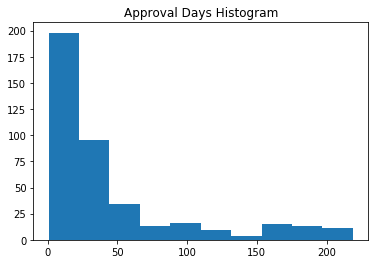

In [205]:
plt.hist(data.approval_days)
plt.title('Approval Days Histogram')
plt.plot()

In [206]:
# Edited table
data = pd.read_csv('FDA-Carpenter_clean.csv')
simplified = data[['dem_senate_maj', 'approval_days', 'child_target']].copy()
simplified['approval_days'] = simplified['approval_days'].apply(lambda x : 0 if x>60  else 1)
simplified.head()

,dem_senate_maj,approval_days,child_target
0,0,1,0
1,0,0,0
2,0,1,0
3,0,1,0
4,0,1,0


In [207]:
def get_joint_3(df, x_value, y_value, z_value, 
                          X = 'dem_senate_maj', Y = 'approval_days', Z = 'child_target'):
    joint_count = len(df[(df[X] == x_value) & (df[Y] == y_value) & (df[Z] == z_value)])
    total = len(df)
    return joint_count/ total


def get_joint_2(df, x_value, z_value, 
                          X = 'dem_senate_maj', Z = 'child_target'):
    joint_count = len(df[(df[X] == x_value) & (df[Z] == z_value)])
    total = len(df)
    return joint_count/ total


def get_marginal(df, z_value, Z = 'child_target'):
    marginal_count = len(df[(df[Z] == z_value)])
    total = len(df)
    return marginal_count/ total


def get_conditional(df, x_value, z_value, 
                                X = 'dem_senate_maj', Z = 'child_target'):
    joint_xz = get_joint_2(df, x_value, z_value)
    marginal_z = get_marginal(df, z_value)
    return joint_xz/ marginal_z


In [216]:
dem = (get_joint_3(simplified, 1, 1, 1)/ get_conditional(simplified, 1, 1) +
          get_joint_3(simplified, 1, 1, 0)/ get_conditional(simplified, 1, 0))
not_dem = (get_joint_3(simplified, 0, 1, 1)/ get_conditional(simplified, 0, 1) +
          get_joint_3(simplified, 0, 1, 0)/ get_conditional(simplified, 0, 0))

ACE = not_dem - dem

print(f'P(Y=1|do(X=0) = {not_dem})')
print(f'P(Y=1|do(X=1) = {dem})')
print(f'ACE = {not_dem - dem}')

P(Y=1|do(X=0) = 0.7592315645655625)
P(Y=1|do(X=1) = 0.841539179774474)
ACE = -0.0823076152089115


# 4 - Refute

### 4a - Complete Model

In [79]:
# Replacing treatment with a random (placebo) variable
res_placebo=model.refute_estimate(identified_estimand_a, estimate,
        method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: approval_days~placebo+wash_post_stories


Refute: Use a Placebo Treatment
Estimated effect:(-14.15655634110429,)
New effect:(-5.136427060122696,)



/Users/annapauxberger/anaconda/envs/py36/lib/python3.6/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:51: FutureWarning: `item` has been deprecated and will be removed in a future version
  control_outcome = control.iloc[indices[i]][self._outcome_name].item()


In [80]:
# Removing a random subset of the data
res_subset=model.refute_estimate(identified_estimand_a, estimate,
        method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)


INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: approval_days~dem_senate_maj+wash_post_stories


Refute: Use a subset of data
Estimated effect:(-14.15655634110429,)
New effect:(-16.301956866666657,)



/Users/annapauxberger/anaconda/envs/py36/lib/python3.6/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:51: FutureWarning: `item` has been deprecated and will be removed in a future version
  control_outcome = control.iloc[indices[i]][self._outcome_name].item()


In [81]:
# Add random seed

res_subset=model.refute_estimate(identified_estimand_a, estimate,
        method_name="data_subset_refuter", subset_fraction=0.9, random_seed = 1)
print(res_subset)

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: approval_days~dem_senate_maj+wash_post_stories


Refute: Use a subset of data
Estimated effect:(-14.15655634110429,)
New effect:(-6.816135866206897,)



/Users/annapauxberger/anaconda/envs/py36/lib/python3.6/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:51: FutureWarning: `item` has been deprecated and will be removed in a future version
  control_outcome = control.iloc[indices[i]][self._outcome_name].item()


### 4a - Simplified Model

In [217]:
# Replacing treatment with a random (placebo) variable
res_placebo=model.refute_estimate(identified_estimand_b, estimate,
        method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: approval_days~placebo+child_target


Refute: Use a Placebo Treatment
Estimated effect:(-14.15655634110429,)
New effect:(25.106917635582814,)



/Users/annapauxberger/anaconda/envs/py36/lib/python3.6/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:51: FutureWarning: `item` has been deprecated and will be removed in a future version
  control_outcome = control.iloc[indices[i]][self._outcome_name].item()


In [218]:
# Removing a random subset of the data
res_subset=model.refute_estimate(identified_estimand_b, estimate,
        method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)


INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: approval_days~dem_senate_maj+child_target
/Users/annapauxberger/anaconda/envs/py36/lib/python3.6/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:51: FutureWarning: `item` has been deprecated and will be removed in a future version
  control_outcome = control.iloc[indices[i]][self._outcome_name].item()


Refute: Use a subset of data
Estimated effect:(-14.15655634110429,)
New effect:(-123.43703207210892,)



In [219]:
# Add random seed

res_subset=model.refute_estimate(identified_estimand_b, estimate,
        method_name="data_subset_refuter", subset_fraction=0.9, random_seed = 1)
print(res_subset)

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: approval_days~dem_senate_maj+child_target


Refute: Use a subset of data
Estimated effect:(-14.15655634110429,)
New effect:(17.853817707382547,)



/Users/annapauxberger/anaconda/envs/py36/lib/python3.6/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:51: FutureWarning: `item` has been deprecated and will be removed in a future version
  control_outcome = control.iloc[indices[i]][self._outcome_name].item()
